# Лабораторная работа №1

**Требования:**
* Python >= 3.X

Лабораторную работу необходимо выполнять в данном шаблоне. Результатом работы будет являться файл (с измененным именем), который необходимо выложить в Moodle.

**Важно!!!** Имя файлу задавайте по следующему шаблону **lab_1_Группа_ФамилияИО.ipynb**. Например: если Вас зовут Иванов Иван Иванович, и Вы обучаетесь в группе 6207_010302D, то имя файла будет выглядеть так **lab_1_6407_010302D_ИвановИИ.ipynb**.

In [1]:
# Код загрузки данных
# Если хотите добавить какие-либо библиотеки
# добавляйте их ИМЕННО ЗДЕСЬ
import matplotlib.pyplot as plt
import re
import nltk
import inflect
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter
import random
nltk.download('gutenberg', quiet=True)
nltk.download('punkt', quiet=True)

# Наименования книг
books = []
# Содержимое книг
raw_texts = []

for fileid in nltk.corpus.gutenberg.fileids():
    books.append(fileid)
    raw_texts.append(nltk.corpus.gutenberg.raw(fileid))

#### Шаг №1
Предобработайте тексты, которые содержатся в списке `raw_texts`, но сначала внимательно изучите их структуру. Сохраните полученные данные в списке `books_tokens` (в разрезе книг, как и было с сырыми текстами).

Порядок обработки текста:
* Замените все числа, которые представлены цифрами, их текстовым представлением (т.е. прописью). Пример: 1 = one, 23 = twenty three, 1042 = one thousand forty two, и т.п. См. библиотеку **inflect**.
* Приведите текст к нижнему регистру
* Произведите токинезацию, в качестве токенов выступают слова.

Подсказка: рекомендуется отлаживать алгоритмы на паре книг, рассчеты на всем корпусе идут продолжительное время.

In [2]:
inf = inflect.engine()
def replace_numbers(match):
    num_text = match.group()
    # Проверка наличия суффикса
    if re.search(r'(st|nd|rd|th|d|ST|ND|RD|TH|D)$', num_text):
        # Удаление суффикса
        number = re.sub(r'(st|nd|rd|th|d|ST|ND|RD|TH|D)$', '', num_text)
        return inf.ordinal(inf.number_to_words(number))
    else:
        # Преобразование числа
        return inf.number_to_words(num_text)

texts = []  # Новый список для хранения преобразованных текстов

for text in raw_texts:
    processed_text = re.sub(r'\b\d+(?:,\d+)?(?:st|nd|rd|th|d|ST|ND|RD|TH|D)?\b', replace_numbers, text)
    texts.append(processed_text.lower())

books_tokens = [word_tokenize(text) for text in texts]

#### Шаг №2

* Вычислите словари для каждой книги (переменная `books_vocabularies`).
* Вычислите словарь для всего корпуса (переменная `books_vocabulary`).
* Рассчитайте частоту употребления токенов в корпусе (переменная `freq_tokens`), и постройте график зависимости частоты употребления токена от токена (для 30-ти самых популярных).

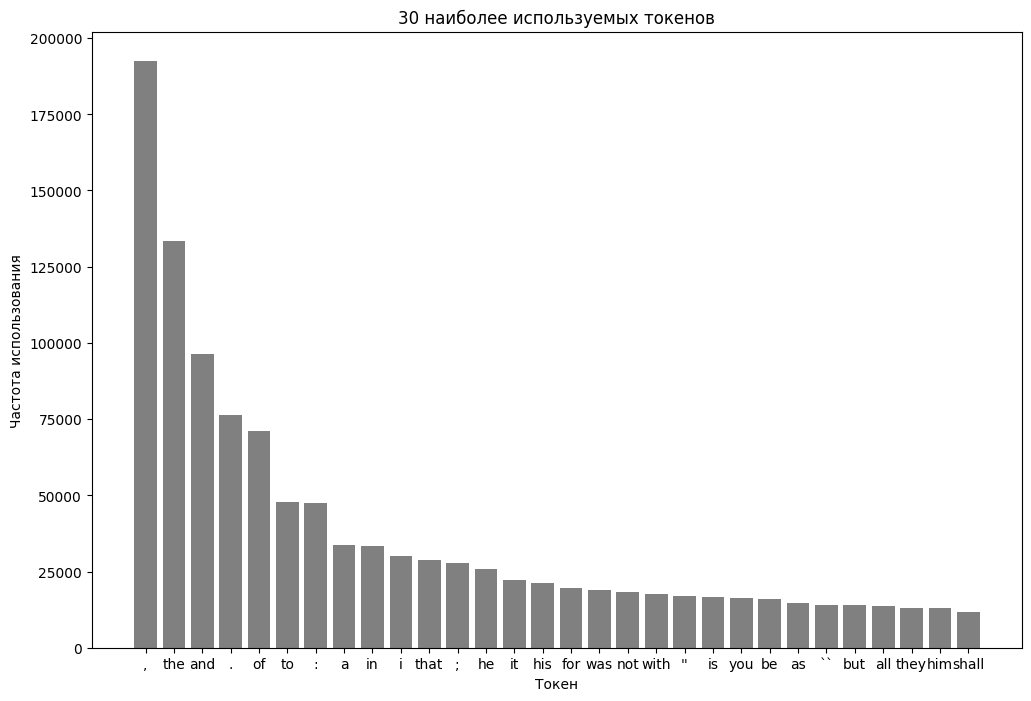

In [5]:

books_vocabularies = [set(tokens) for tokens in books_tokens] #cловарь для каждой книги
books_tokens_ext = sum(books_tokens, [])
books_vocabulary = set(books_tokens_ext)  #словарь для всего корпуса
freq_tokens = Counter(books_tokens_ext)
top_30_tokens = freq_tokens.most_common(30)
tokens, freq = zip(*top_30_tokens)

def ploting(x_label, y_label, title, x, y):
    plt.figure(figsize=(12, 8))
    plt.bar(x, y, color='grey')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
ploting('Токен', 'Частота использования', '30 наиболее используемых токенов', tokens, freq)

#### Шаг №3
* Сгенерируйте список триграмм (переменная `trigrams`) по всему корпусу и рассчитайте частоту их употребления (переменная `freq_trigrams`).
* Реализуйте наивный генератор текста (30 токенов). 
    1. Для затравки берется два стартовых токена, которые становятся текущими. Первый токен выводится на экран.
    2. Второй токен из активной пары токенов выводится на экран. Если мы сгененрировали нужное количество текста, то останавливаем алгоритм.
    3. По текущей паре токенов (первые в триграмме) определяется наиболее употребительная траграмма, которая помечается как использованная. Использованные триграммы на последующих шагах в рассмотрении не участвуют. Второй и третий токены данной триграммы становятся текущими. Переходим к п. 2.

In [6]:
corpus = ' '.join(texts) #Представим корпус в виде текста
# Разбиваем текст на предложения
sentences = sent_tokenize(corpus) 

def create_trigrams(sentence):
    tokens = ['<s>', '<s>'] + word_tokenize(sentence) + ['</s>', '</s>'] #Для каждого предложения добавляем токены в начало и конец
    trigrams = list(ngrams(tokens, 3))
    return trigrams

trigrams = []
for sentence in sentences:
    sentence_trigrams = create_trigrams(sentence)
    trigrams.extend(sentence_trigrams)

trigram_frequencies = Counter(trigrams)
trigram, freq_trigrams = zip(*trigram_frequencies.most_common())

# Выбираем случайную триграмму
random_trigram = random.choice(list(trigram_frequencies.keys()))
text = list(random_trigram[:2]) # Добавляем первые два слова из случайной триграммы в список

used_trigrams = []  # Инициализируем список для хранения использованных триграмм

def find_next_word(current_pair, trigram_frequencies, used_trigrams):
    available_trigrams = [trigram for trigram in trigram_frequencies #Проходим по триграммам
                  if trigram[0] == current_pair[0]  #Проверка на то, чтобы первые два элемента триграммы были такие же, как в текущей триграмме
                  and trigram[1] == current_pair[1]
                  and trigram not in used_trigrams]
    if available_trigrams:
        most_popular_trigram = sorted(available_trigrams, key=lambda trigram: trigram_frequencies[trigram], reverse=True)[0]
        used_trigrams.append(most_popular_trigram)  # Добавляем использованную триграмму в список
        return most_popular_trigram[2]  # Возвращаем третий элемент самой частой триграммы
    else:
        return None

# Добавляем слова в текст, пока его длина не достигнет 30 слов
while len(text) < 30:
    current_pair = (text[-2], text[-1])
    word = find_next_word(current_pair, trigram_frequencies, used_trigrams)
    if word:
        text.append(word)
    else:
        break  # Прерываем цикл, если не найдено подходящее слово


text = ' '.join(text)
print(text)


quantity of oil , and the lord , and i will not be afraid of the lord . </s> </s>
